In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
median_ages = df.groupby(['Pclass', 'Sex'])['Age'].transform('median')

# df['Age'].fillna(median_ages, inplace=True)
df['Age'] = df['Age'].fillna(median_ages)

In [8]:
most_frequent_port = df['Embarked'].mode()[0]

df['Embarked'] = df['Embarked'].fillna(most_frequent_port)

print(f"Missing 'Embarked' values filled with mode: '{most_frequent_port}'.")

Missing 'Embarked' values filled with mode: 'S'.


In [9]:
# Create a new column 'Has_Cabin' - 1 if Cabin data exists, 0 otherwise
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# We can now drop the original 'Cabin' column as it's not useful for direct analysis
df.drop('Cabin', axis=1, inplace=True)

print("Created 'Has_Cabin' feature and dropped original 'Cabin' column.")

Created 'Has_Cabin' feature and dropped original 'Cabin' column.


In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

print("Created 'FamilySize' feature.")

Created 'FamilySize' feature.


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
FamilySize     0
dtype: int64

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


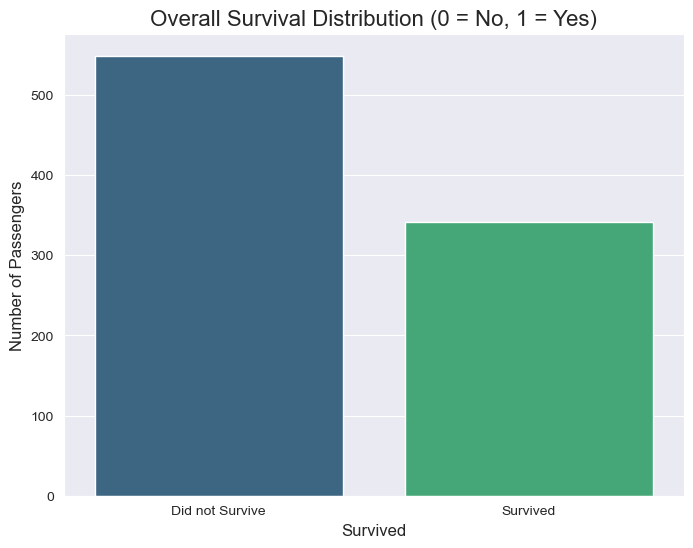

Overall Survival Rate: 38.38%


In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='viridis', hue='Survived', legend=False)
plt.title('Overall Survival Distribution (0 = No, 1 = Yes)', fontsize=16)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Did not Survive', 'Survived'])
plt.show()

# Calculate and print the exact percentage
survival_rate = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")

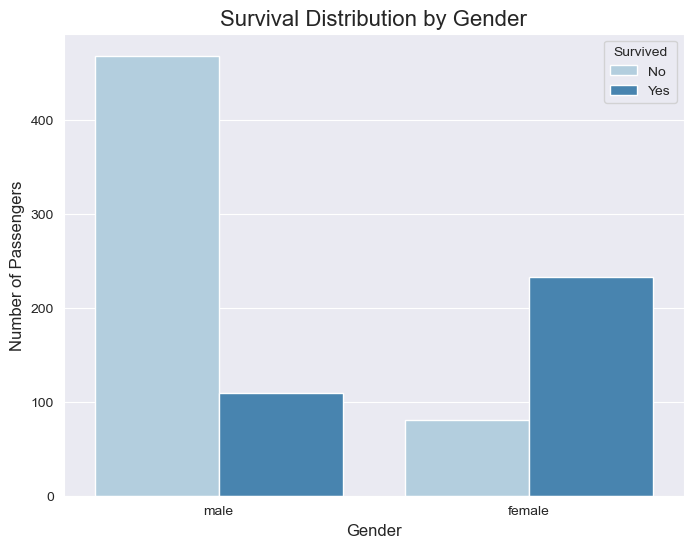

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Blues')
plt.title('Survival Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

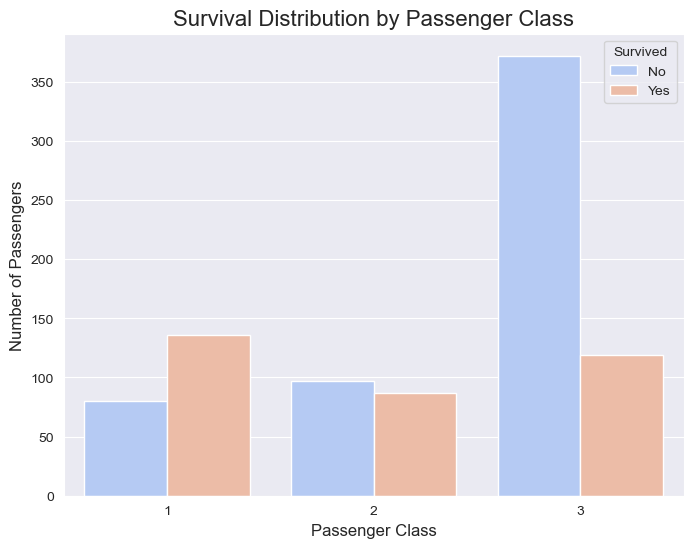

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival Distribution by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

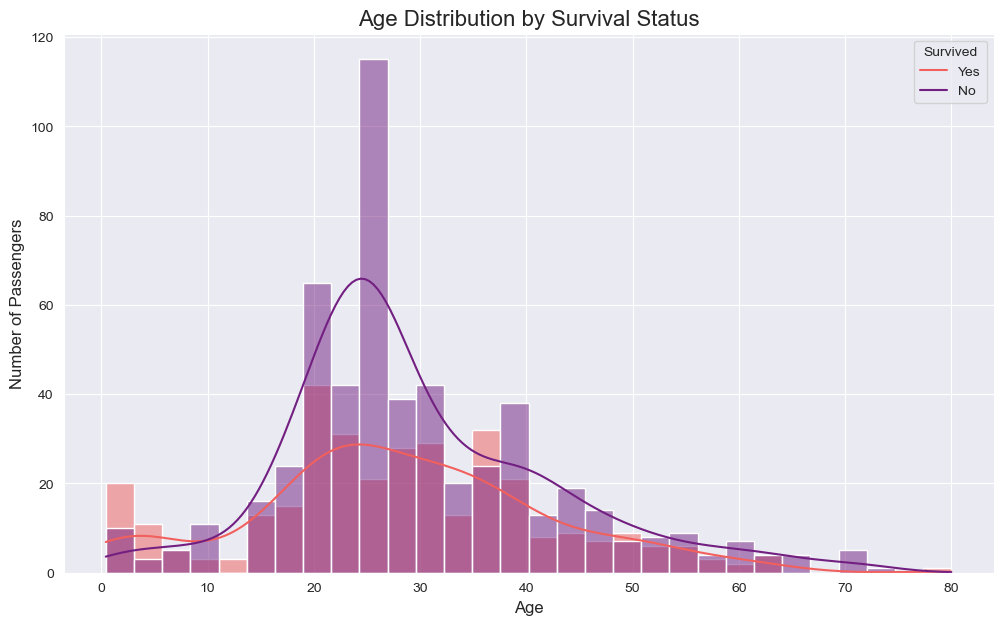

In [16]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, palette='magma')
plt.title('Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survived', labels=['Yes', 'No']) # Note: Hue order might affect label order
plt.show()

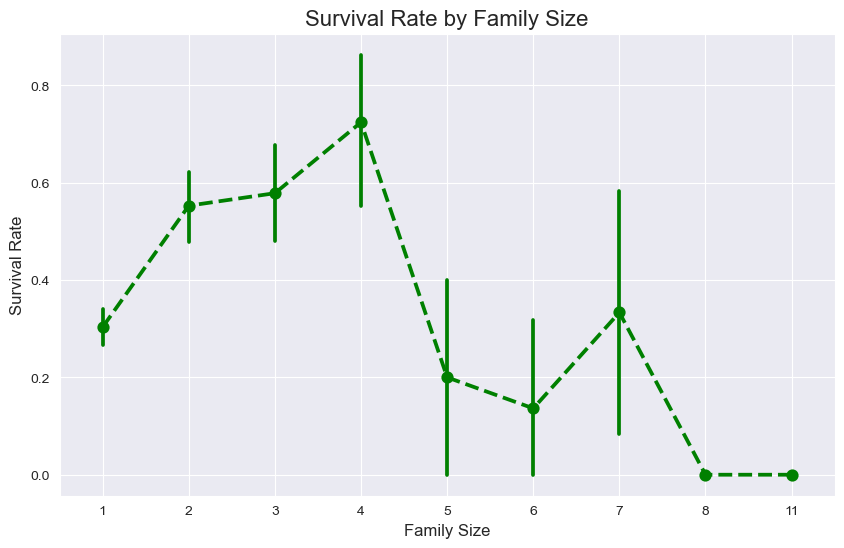

In [17]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='FamilySize', y='Survived', data=df, color='green', markers='o', linestyles='--')
plt.title('Survival Rate by Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.grid(True)
plt.show()

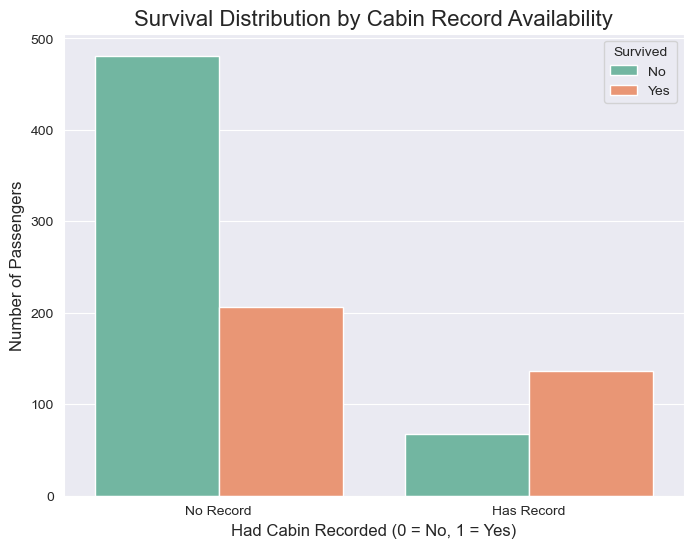

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Has_Cabin', hue='Survived', data=df, palette='Set2')
plt.title('Survival Distribution by Cabin Record Availability', fontsize=16)
plt.xlabel('Had Cabin Recorded (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Record', 'Has Record'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

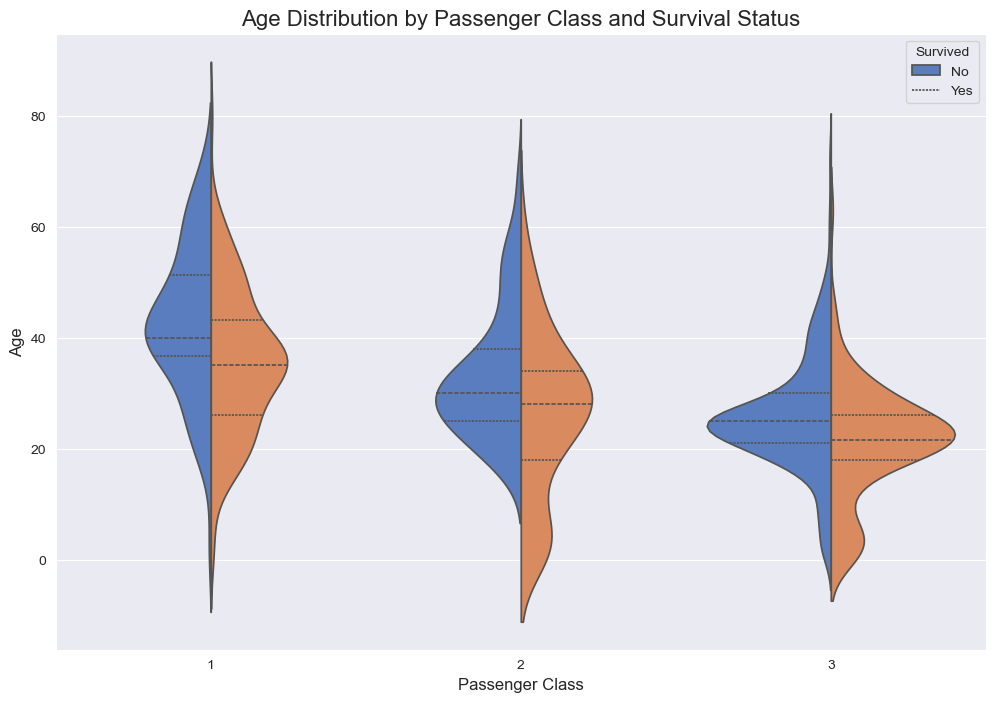

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, palette='muted', inner='quartile')
plt.title('Age Distribution by Passenger Class and Survival Status', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
plt.savefig('age_class_survival_violin.png', bbox_inches='tight')

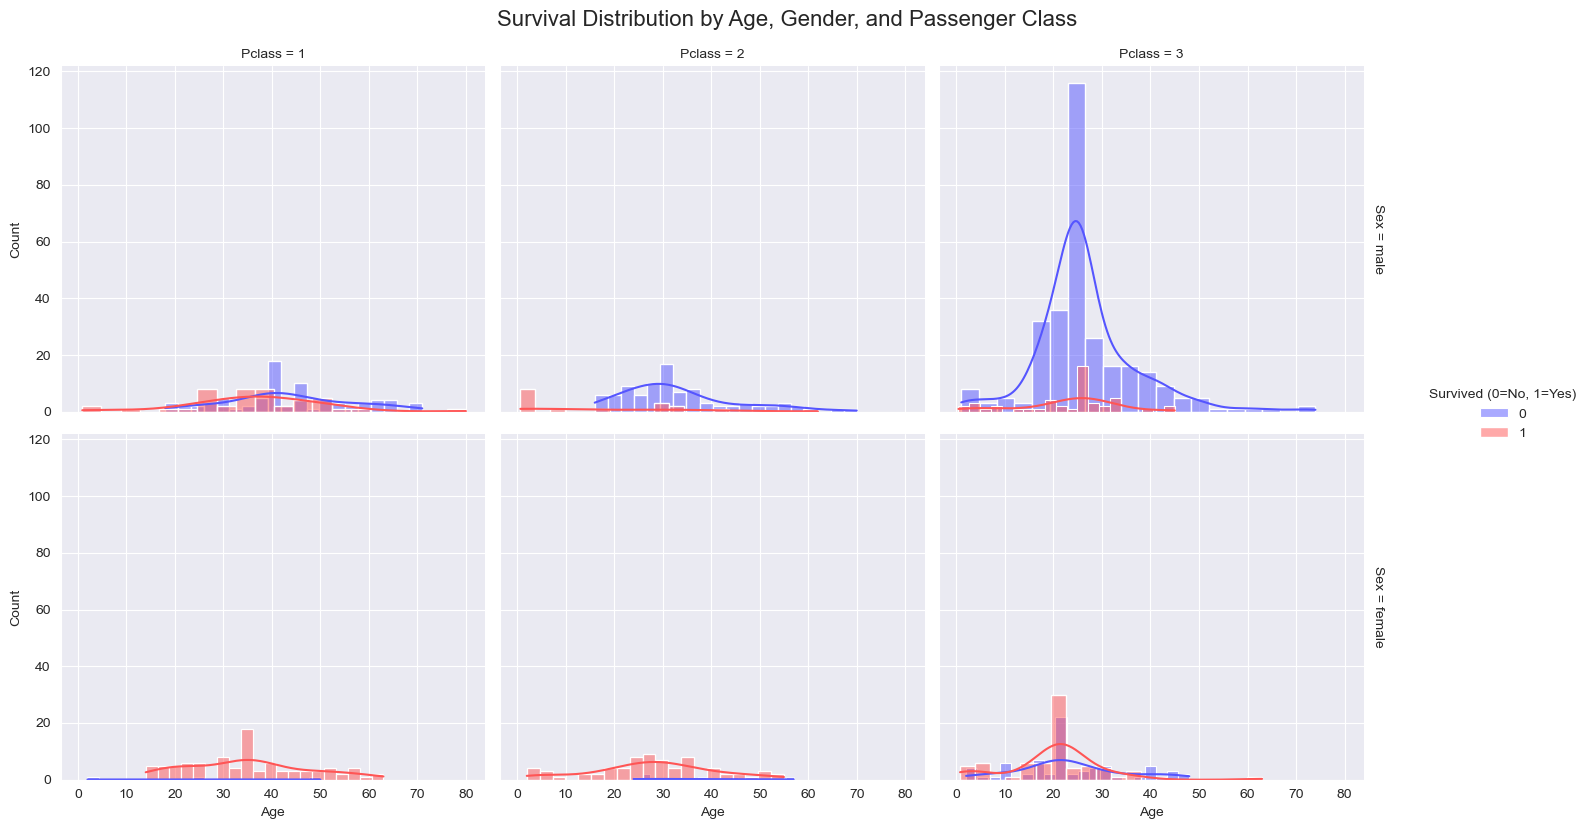

In [20]:
# Create a FacetGrid - plotting Age distribution separated by Sex and Pclass, colored by Survival
g = sns.FacetGrid(df, col='Pclass', row='Sex', hue='Survived', margin_titles=True, height=4, aspect=1.2, palette='seismic')
g.map(sns.histplot, 'Age', kde=True, bins=20)

# Add titles and legend
g.fig.suptitle('Survival Distribution by Age, Gender, and Passenger Class', y=1.03, fontsize=16) # y=1.03 adjusts title position
g.add_legend(title='Survived (0=No, 1=Yes)')
g.set_axis_labels('Age', 'Count')
plt.show()

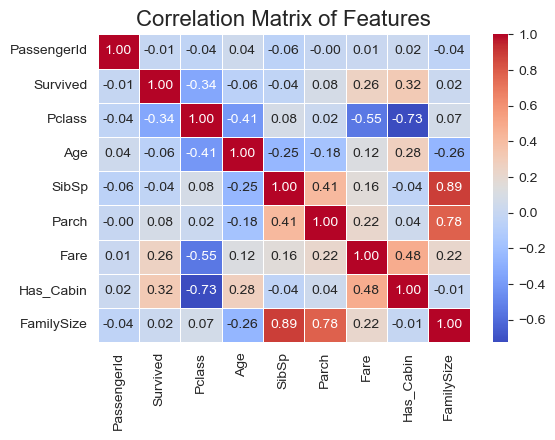

In [23]:
# Calculate the correlation matrix for numeric features only
plt.figure(figsize=(6, 4))
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()